C:\Users\Asus\AppData\Local\Temp\ipykernel_5036\498632639.py:7: RuntimeWarning: overflow encountered in scalar subtract
  mesafeler = np.array([np.linalg.norm(x - merkezler[0]) for x in X])
C:\Users\Asus\AppData\Local\Temp\ipykernel_5036\498632639.py:16: RuntimeWarning: overflow encountered in scalar subtract
  mesafeler = np.minimum(mesafeler, [np.linalg.norm(x - merkezler[-1]) for x in X])


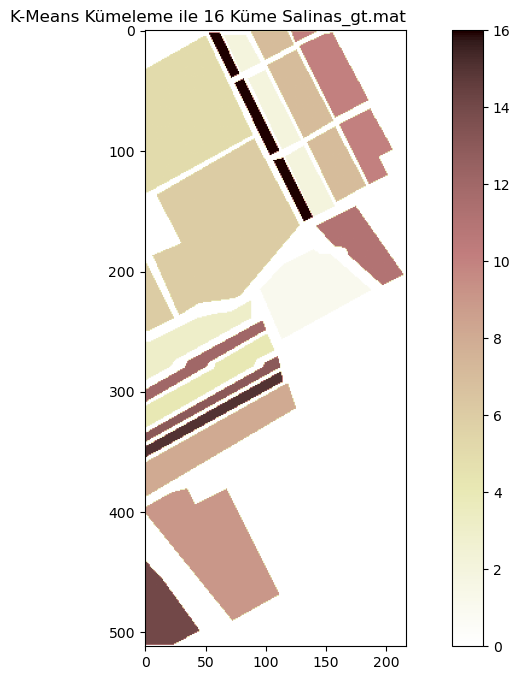

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

def kmeans_pp_baslangic_noktalarini_belirle(X, kume_sayisi):
    merkezler = [X[np.random.choice(range(len(X)))]]
    mesafeler = np.array([np.linalg.norm(x - merkezler[0]) for x in X])
    for _ in range(1, kume_sayisi):
        olasiliklar = mesafeler / mesafeler.sum()
        kumulatif_olasiliklar = np.cumsum(olasiliklar)
        r = np.random.rand()
        for i, p in enumerate(kumulatif_olasiliklar):
            if r < p:
                merkezler.append(X[i])
                break
        mesafeler = np.minimum(mesafeler, [np.linalg.norm(x - merkezler[-1]) for x in X])
    return np.array(merkezler)

def kmeans(X, kume_sayisi, max_iter=100, esik_deger=0.001):
    merkezler = kmeans_pp_baslangic_noktalarini_belirle(X, kume_sayisi)
    for _ in range(max_iter):
        uzakliklar = np.abs(X[:, np.newaxis] - merkezler)
        en_yakin_kume = np.argmin(uzakliklar, axis=1)
        yeni_merkezler = np.array([X[en_yakin_kume == k].mean() if np.any(en_yakin_kume == k) else merkezler[k] for k in range(kume_sayisi)])
        if np.linalg.norm(yeni_merkezler - merkezler) < esik_deger:
            break
        merkezler = yeni_merkezler
    return en_yakin_kume, merkezler

def veriyi_yukle_ve_isle(dosya_yolu):
    veri = scipy.io.loadmat(dosya_yolu)
    salinas_zemin_gercegi = veri['salinas_gt']
    X = salinas_zemin_gercegi.ravel()
    X = X[X > 0]
    return X, salinas_zemin_gercegi

def kumeleri_goster(salinas_zemin_gercegi, kumeler, kume_sayisi):
    tam_kumeler = np.zeros_like(salinas_zemin_gercegi.ravel())
    maske = salinas_zemin_gercegi.ravel() > 0
    tam_kumeler[maske] = kumeler + 1
    plt.figure(figsize=(12, 8))
    plt.imshow(tam_kumeler.reshape(salinas_zemin_gercegi.shape), cmap='pink_r')
    plt.colorbar()
    plt.title(f'K-Means Kümeleme ile {kume_sayisi} Küme Salinas_gt.mat', loc='right')
    plt.show()


dosya_yolu = 'Salinas_gt.mat'
X, salinas_zemin_gercegi = veriyi_yukle_ve_isle(dosya_yolu)
kume_sayisi = len(np.unique(X))
kumeler, merkezler = kmeans(X, kume_sayisi)
kumeleri_goster(salinas_zemin_gercegi, kumeler, kume_sayisi)


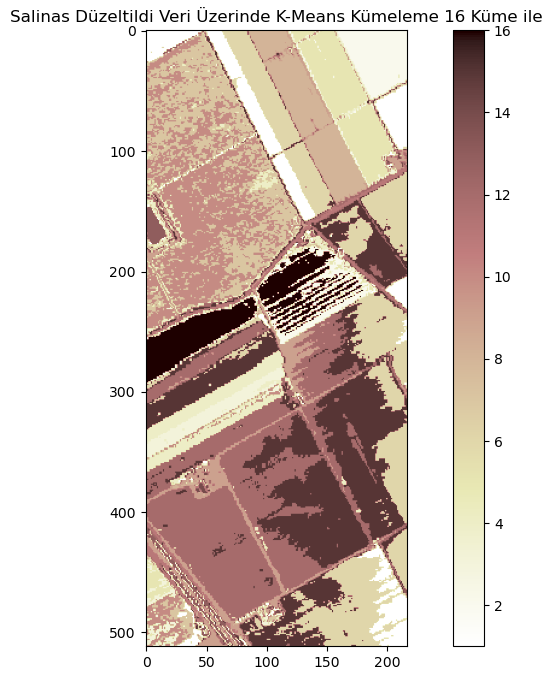

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

def kmeans_pp_baslangic_noktalarini_belirle(X, kume_sayisi):
    # İlk merkez rastgele seçilmesi
    merkezler = [X[np.random.choice(range(len(X)))]]
    # Her noktanın ilk merkeze olan uzaklığı hesaplanması
    mesafeler = np.array([np.linalg.norm(x - merkezler[0]) for x in X])
    for _ in range(1, kume_sayisi):
        # Mesafelere göre olasılık dağılımı hesaplanması
        olasiliklar = mesafeler / mesafeler.sum()
        kumulatif_olasiliklar = np.cumsum(olasiliklar)
        r = np.random.rand()
        for i, p in enumerate(kumulatif_olasiliklar):
            if r < p:
                merkezler.append(X[i])
                break
        # Yeni merkez seçildikten sonra mesafe güncellenmesi
        mesafeler = np.minimum(mesafeler, [np.linalg.norm(x - merkezler[-1]) for x in X])
    return np.array(merkezler)

def kmeans(X, kume_sayisi, max_iter=100, esik_deger=0.001):
    # K-Means++ ile başlangıç merkezleri belirlenmesi
    merkezler = kmeans_pp_baslangic_noktalarini_belirle(X, kume_sayisi)
    for _ in range(max_iter):
        # Her noktanın merkezlere olan uzaklıkları hesaplanması
        uzakliklar = np.linalg.norm(X[:, np.newaxis] - merkezler, axis=2)
        # Her nokta en yakın merkeze atanması
        en_yakin_kume = np.argmin(uzakliklar, axis=1)
        # Yeni merkezler hesaplanması
        yeni_merkezler = np.array([X[en_yakin_kume == k].mean(axis=0) if np.any(en_yakin_kume == k) else merkezler[k] for k in range(kume_sayisi)])
        # Eğer merkezler değişmediyse döngü sonlandırılması
        if np.all(np.linalg.norm(yeni_merkezler - merkezler, axis=1) < esik_deger):
            break
        merkezler = yeni_merkezler
    return en_yakin_kume, merkezler

def veriyi_yukle(dosya_yolu):
    # Veriyi yükleme ve işleme
    data = scipy.io.loadmat(dosya_yolu)
    salinas_duzeltilmis = data['salinas_corrected']
    satirlar, sutunlar, bantlar = salinas_duzeltilmis.shape
    X = salinas_duzeltilmis.reshape(satirlar * sutunlar, bantlar)
    # Sadece sıfırdan büyük değerleri alma
    X = X[np.any(X > 0, axis=1)]
    return X, satirlar, sutunlar

def kumeleri_goster(X, satirlar, sutunlar, bantlar, kumeler, kume_sayisi):
    # Küme sonuçlarını orijinal boyutlara yerleştirme
    tam_kumeler = np.zeros((satirlar * sutunlar,))
    maske = np.any(X.reshape(satirlar * sutunlar, bantlar) > 0, axis=1)
    tam_kumeler[maske] = kumeler + 1

    # Sonuçları görselleştirme
    plt.figure(figsize=(12, 8))
    plt.imshow(tam_kumeler.reshape(satirlar, sutunlar), cmap='pink_r')
    plt.colorbar()
    plt.title(f'Salinas Düzeltildi Veri Üzerinde K-Means Kümeleme {kume_sayisi} Küme ile')
    plt.show()


dosya_yolu = 'Salinas_corrected.mat'
X, satirlar, sutunlar = veriyi_yukle(dosya_yolu)
kume_sayisi = 16
kumeler, merkezler = kmeans(X, kume_sayisi)
kumeleri_goster(X, satirlar, sutunlar, X.shape[1], kumeler, kume_sayisi)


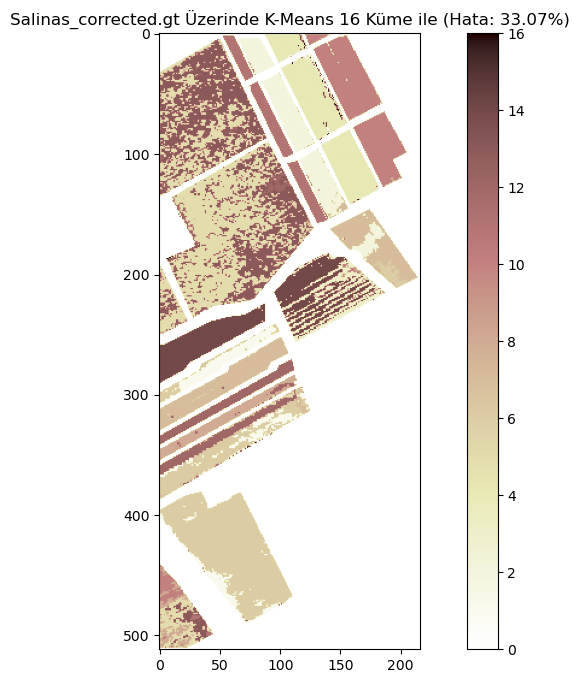

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.optimize import linear_sum_assignment

def kmeans_pp_initialization(X, k):
    centers = [X[np.random.choice(range(len(X)))]]
    distances = np.array([np.linalg.norm(x - centers[0]) for x in X])
    for _ in range(1, k):
        probabilities = distances / distances.sum()
        cumulative_probabilities = np.cumsum(probabilities)
        r = np.random.rand()
        for i, p in enumerate(cumulative_probabilities):
            if r < p:
                centers.append(X[i])
                break
        distances = np.minimum(distances, [np.linalg.norm(x - centers[-1]) for x in X])
    return np.array(centers)

def kmeans(X, kume_sayisi, max_iter=100, threshold=0.001):
    merkezler = kmeans_pp_initialization(X, kume_sayisi)
    for _ in range(max_iter):
        uzakliklar = np.linalg.norm(X - merkezler[:, np.newaxis], axis=2)
        en_yakin_kume = np.argmin(uzakliklar, axis=0)
        yeni_merkezler = np.array([X[en_yakin_kume == k].mean(axis=0) if np.any(en_yakin_kume == k) else merkezler[k] for k in range(kume_sayisi)])
        if np.all(np.linalg.norm(yeni_merkezler - merkezler, axis=1) < threshold):
            break
        merkezler = yeni_merkezler
    return en_yakin_kume, merkezler


# Ayarlanmış hata oranını hesaplama fonksiyonu
def ayarlanmis_hata_orani_hesapla(kumeler, gercek_degerler, kume_sayisi):
    karisiklik_matrisi = np.zeros((kume_sayisi, kume_sayisi), dtype=int)
    for i in range(kume_sayisi):
        for j in range(kume_sayisi):
            karisiklik_matrisi[i, j] = np.sum((kumeler == i) & (gercek_degerler == j))

    satir_ind, sutun_ind = linear_sum_assignment(-karisiklik_matrisi)
    ayarlanmis_kumeler = np.zeros_like(kumeler)
    for i, j in zip(satir_ind, sutun_ind):
        ayarlanmis_kumeler[kumeler == i] = j

    ayarlanmis_hata = np.mean(ayarlanmis_kumeler != gercek_degerler) * 100
    return ayarlanmis_hata

# Veri yükleme fonksiyonu
def veri_yukle(dosya_yolu):
    return scipy.io.loadmat(dosya_yolu)

# Veri düzleştirme fonksiyonu
def veri_duzlestir(salinas_verisi):
    satirlar, sutunlar, bantlar = salinas_verisi.shape
    X_duz = salinas_verisi.reshape(satirlar * sutunlar, bantlar)
    return X_duz, satirlar, sutunlar

def kumeleri_goster(satirlar, sutunlar, kumeler, kume_sayisi, hata_yuzdesi):
    tam_kumeler = np.zeros((satirlar * sutunlar,))
    tam_kumeler[gt_maske] = kumeler + 1

    plt.figure(figsize=(12, 8))
    plt.imshow(tam_kumeler.reshape(satirlar, sutunlar), cmap='pink_r')  # Renk paleti değiştirildi
    plt.colorbar()
    plt.title(f'Salinas_corrected.gt Üzerinde K-Means {kume_sayisi} Küme ile (Hata: {hata_yuzdesi:.2f}%)')
    plt.show()


corrected_path = 'Salinas_corrected.mat'
gt_path = 'Salinas_gt.mat'

salinas_duzeltilmis = veri_yukle(corrected_path)['salinas_corrected']
salinas_gercek_degerler = veri_yukle(gt_path)['salinas_gt']

X_duz, satirlar, sutunlar = veri_duzlestir(salinas_duzeltilmis)
X_gt_duz = salinas_gercek_degerler.ravel()

# Sadece sıfırdan farklı değerler için maske oluşturma
gt_maske = X_gt_duz > 0
X_gt_filtreli = X_gt_duz[gt_maske]

# K-means öbeklemeyi uygulama
kume_sayisi = 16
kumeler, merkezler = kmeans(X_duz, kume_sayisi)

# Öbekleme sonuçlarını gt_maske ile filtreleme
kumeler_filtreli = kumeler[gt_maske]

# Ayarlanmış hata yüzdesini hesaplama
ayarlanmis_hata_yuzdesi = ayarlanmis_hata_orani_hesapla(kumeler_filtreli, X_gt_filtreli, kume_sayisi)

# Görselleştirme
kumeleri_goster(satirlar, sutunlar, kumeler_filtreli, kume_sayisi, ayarlanmis_hata_yuzdesi)